### Assignment : Clustering and PCA

## Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

- ####  Setting Environment

In [79]:
# suppress warning messages
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# To perform KMeans clustering 
from sklearn.cluster import KMeans

- #### Importing and Understanding Data Set

In [80]:
# importing data set
country_df = pd.read_csv(r'data/Country-data.csv')

In [81]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [82]:
# shape of data
country_df.shape

(167, 10)

In [83]:
# basic info 
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [84]:
# Checking null values
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

```There is no null values found to treat```

In [85]:
# Change Export, Import and Health from percentage to actual value of GDP
country_df['exports']=(country_df['exports']*country_df['gdpp'])/100
country_df['health']=(country_df['health']*country_df['gdpp'])/100
country_df['imports']=(country_df['imports']*country_df['gdpp'])/100

In [86]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [87]:
# checking statistics
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [88]:
# checking outliers
country_df.describe(percentiles=[.25,.5,.75,.80,.85,.90,.95,.97,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
80%,66.320000,10194.960000,1274.646000,9854.720000,29420.000000,12.500000,78.200000,4.592000,21020.000000
85%,88.310000,12667.230000,2202.666000,11434.140000,36200.000000,15.330000,79.910000,5.023000,31090.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000


In [89]:
# copying data to new data frame
countryDf= country_df.copy()

In [90]:
# checking for duplicate countries
countryDf.duplicated().sum()

0

#### as seen, no duplicate country is found

## Outlier treatment

- #### Plot before treament

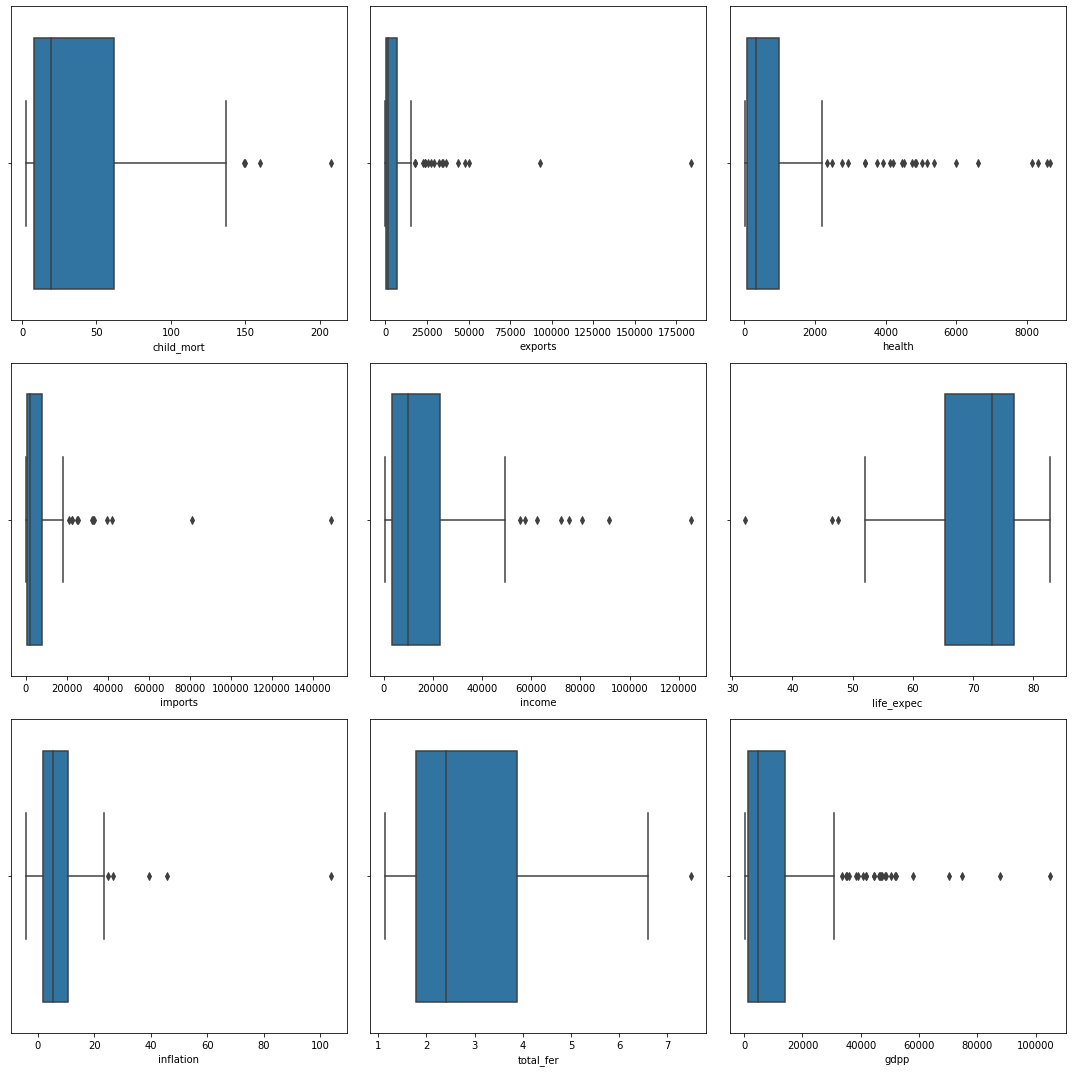

In [91]:
# Plotting the original data
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.boxplot(countryDf.child_mort, ax = axs[0,0])
sns.boxplot(countryDf.exports, ax = axs[0,1])
sns.boxplot(countryDf.health, ax = axs[0,2])
sns.boxplot(countryDf.imports, ax = axs[1,0])
sns.boxplot(countryDf.income, ax = axs[1,1])
sns.boxplot(countryDf.life_expec, ax = axs[1,2])
sns.boxplot(countryDf.inflation, ax = axs[2,0])
sns.boxplot(countryDf.total_fer, ax = axs[2,1])
sns.boxplot(countryDf.gdpp, ax = axs[2,2])
plt.tight_layout()
plt.show()

#### there seems to be outlier. We will treat the outliers using capping

In [92]:
# function to treat outliers. We will cap with 0.02 as min and 0.98 as max
# There does not seem be a small value of outlier so we will it as small as possible

for col in countryDf[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]:
    perc = countryDf[col].quantile([0.02,0.85]).values
    countryDf[col][countryDf[col] <= perc[0]] = perc[0]
    countryDf[col][countryDf[col] >= perc[1]] = perc[1]

In [93]:
countryDf.shape

(167, 10)

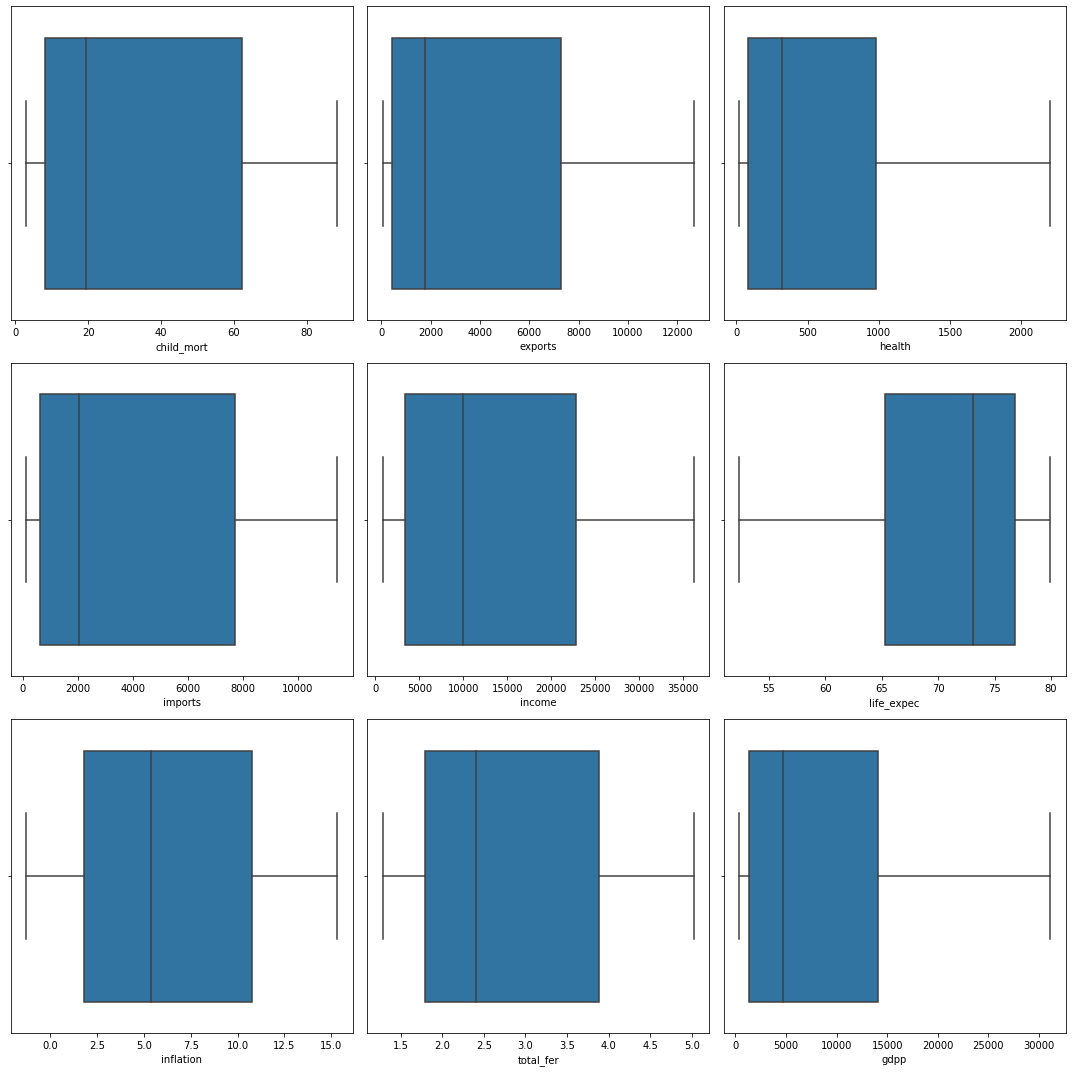

In [94]:
# Plotting the after outlier treatment
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.boxplot(countryDf.child_mort, ax = axs[0,0])
sns.boxplot(countryDf.exports, ax = axs[0,1])
sns.boxplot(countryDf.health, ax = axs[0,2])
sns.boxplot(countryDf.imports, ax = axs[1,0])
sns.boxplot(countryDf.income, ax = axs[1,1])
sns.boxplot(countryDf.life_expec, ax = axs[1,2])
sns.boxplot(countryDf.inflation, ax = axs[2,0])
sns.boxplot(countryDf.total_fer, ax = axs[2,1])
sns.boxplot(countryDf.gdpp, ax = axs[2,2])
plt.tight_layout()
plt.show()

### Checking correlation of variables

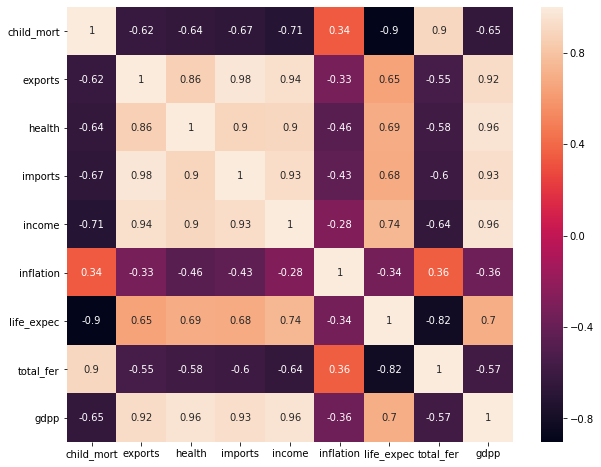

In [95]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (10, 8))
sns.heatmap(countryDf.corr(), annot = True,)
plt.show()

### There are a degree collinarity between variable. The PCA should handle it but before let's normalize the data

## Scaling Data

In [96]:
# importing StandardScaler

countryDf_2=countryDf.copy()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols= ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
countryDf_2[cols]= scaler.fit_transform(countryDf[cols])

In [97]:
countryDf_2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.260334e-17,-1.981117e-16,6.249160e-17,-4.387708e-17,1.602178e-16,8.509494e-17,1.276424e-16,5.318434e-17,-2.659217e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-1.009402e+00,-8.787982e-01,-8.403793e-01,-9.373694e-01,-1.099445e+00,-1.445068e+00,-2.252919e+00,-1.202864e+00,-8.816328e-01
25%,-8.386377e-01,-7.938444e-01,-7.619943e-01,-8.135022e-01,-8.976937e-01,-8.667027e-01,-6.513789e-01,-8.073900e-01,-7.937069e-01
50%,-4.792201e-01,-5.067570e-01,-4.445877e-01,-4.760072e-01,-3.683350e-01,-1.984047e-01,3.134041e-01,-3.325436e-01,-4.905079e-01
75%,9.129130e-01,6.802998e-01,4.098115e-01,8.865950e-01,6.607288e-01,8.021755e-01,7.710576e-01,8.024550e-01,3.644585e-01
max,1.765432e+00,1.843331e+00,2.008549e+00,1.778633e+00,1.734674e+00,1.657149e+00,1.155734e+00,1.684974e+00,1.915963e+00


In [98]:
# Removing country column
X=countryDf_2.drop(['country'],axis=1)
# storing year in y
y=countryDf_2['country']

## Applying PCA on the data set

In [99]:
# import library
from sklearn.decomposition import PCA

pca = PCA(random_state=42)

# fitting PCA on the data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [100]:
# Looking at PCA componets
pca.components_

array([[-0.32647492,  0.35556356,  0.35879291,  0.36660354,  0.36940134,
        -0.17948376,  0.33151103, -0.30276299,  0.36554263],
       [ 0.47088889,  0.31530675,  0.22986426,  0.25275847,  0.19668864,
         0.11245922, -0.38409653,  0.5331343 ,  0.28111396],
       [-0.12393434,  0.07986076, -0.09075362, -0.03351823,  0.17178471,
         0.95596209,  0.13190303, -0.07726024,  0.04649513],
       [-0.021291  ,  0.40058124, -0.44561992,  0.32295265,  0.03937101,
        -0.02572704, -0.52932541, -0.44502904, -0.23613057],
       [ 0.13831611, -0.3353209 ,  0.48658173, -0.24828496,  0.04350485,
         0.08929595, -0.48542987, -0.52146412,  0.22932059],
       [-0.79496842, -0.0939187 ,  0.10423659,  0.00835264, -0.02852466,
         0.01164932, -0.45289504,  0.3761022 ,  0.02744631],
       [ 0.00482763,  0.11328462,  0.42570578,  0.41783313, -0.73942412,
         0.17609184,  0.06338325, -0.05830102, -0.21485005],
       [-0.00917604, -0.20850214, -0.426243  ,  0.20033227, -0

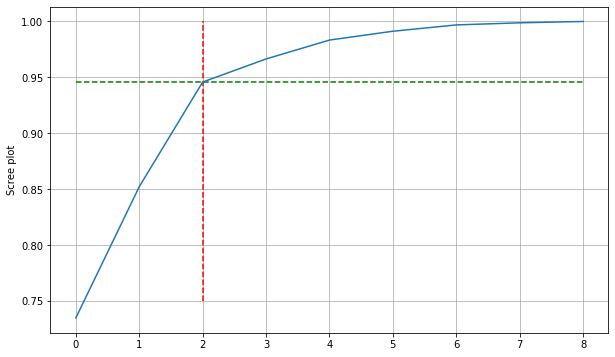

In [101]:
# Looking at PCA scree plot
plt.figure(figsize=(10,6))
plt.vlines(x=2, ymax=1, ymin=0.75, colors="r", linestyles="--")
plt.hlines(y=0.9457, xmax=8, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Scree plot")
plt.grid()

In [102]:
np.cumsum(pca.explained_variance_ratio_.round(4)*100)

array([ 73.46,  85.2 ,  94.57,  96.64,  98.33,  99.12,  99.69,  99.88,
       100.  ])

``` Will choose 3 components that describes about 94.57% variance```

In [103]:
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'Features':X.columns})

In [104]:
pca_df

,PC1,PC2,PC3,Features
0,-0.326475,0.470889,-0.123934,child_mort
1,0.355564,0.315307,0.079861,exports
2,0.358793,0.229864,-0.090754,health
3,0.366604,0.252758,-0.033518,imports
4,0.369401,0.196689,0.171785,income
5,-0.179484,0.112459,0.955962,inflation
6,0.331511,-0.384097,0.131903,life_expec
7,-0.302763,0.533134,-0.077260,total_fer
8,0.365543,0.281114,0.046495,gdpp


### Run the PCA with the components choosed above

In [105]:
# Incremental PCA 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [106]:
df_train_pca = pca_final.fit_transform(X)
pcadf = pd.DataFrame(df_train_pca,columns= ['PC1', 'PC2','PC3'])
pcadf.shape

(167, 3)

### Plotting Correlation Matrix for the 3 components

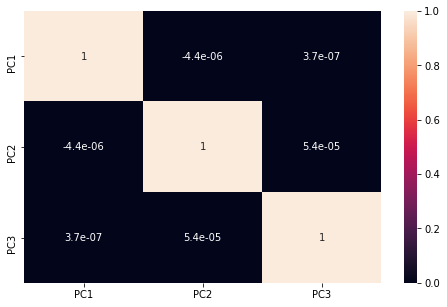

In [107]:
plt.figure(figsize=(8,5))
sns.heatmap(pcadf.corr(),annot=True)
plt.show()

``` As shown above, the correlcation is around 0 and there is not any signficant correlation between selected components```

In [108]:
# concatenating country name with pcadf (DataFrame)
pcadf_country= pd.concat([y,pcadf],axis=1)

In [109]:
pcadf_country.head()

,country,PC1,PC2,PC3
0,Afghanistan,-3.410557,1.335314,-0.234486
1,Albania,-0.163978,-1.741221,-0.193250
2,Algeria,-0.868662,-0.816567,1.693218
3,Angola,-2.918449,1.657255,0.971242
4,Antigua and Barbuda,1.469472,-0.618764,-0.592412


In [110]:
pcadf_country.shape

(167, 4)

# Clustering 

In [111]:
# copy data to new DataFrame

pca_cleaned = pcadf_country.copy()
# extract country from cleaned
pca_cleaned_final=pca_cleaned.drop('country',axis=1)
pca_cleaned_final_hierchy=pca_cleaned_final

### Hopkins Statistics
Hopkins Statistics help us to see how well the clusters are formed:

- if value is between 0.01 - 0.3 : Low chase of clustering
- if value is around 0.5 : Random
- if value is between 0.7 - 0.99 : High chance of clustering

In [112]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [113]:
hopkins(pca_cleaned_final)

0.7561863130344039

``` Since the value is above 0.7 , there is a high chance of clustering to be formed ```

## Applying K- Means clustering

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [114]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pca_cleaned_final)
    sse_.append([k, silhouette_score(pca_cleaned_final, kmeans.labels_)])

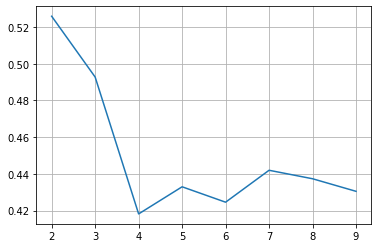

In [115]:
# Plotting 
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.grid()
plt.show();

### Look at the Elbow Curve plot and choose the optimal number of cluster

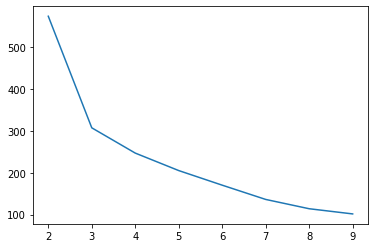

In [116]:
ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(pca_cleaned_final)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

``` **Both Silhouette Analysis and Elbow Curve ** shows 3 clusters a good choice to work on it```

### KMeans with the K the we have choosed

- We will use three k=3 and also k=4 to see the results

In [117]:
# Save data for K=4
pca_cleaned_final4=pca_cleaned_final.copy()

### Kmeans k=3

In [118]:
from sklearn.cluster import KMeans

In [119]:
# Applying Kmeans with K=3
pca_cleaned_final_kmeans = KMeans(n_clusters = 3, max_iter=50, random_state=50)
pca_cleaned_final_kmeans.fit(pca_cleaned_final);

In [120]:
pca_cleaned_final_km=pd.concat([pca_cleaned.reset_index().drop('index',axis=1),pd.Series(pca_cleaned_final_kmeans.labels_).reset_index().drop('index',axis=1)],axis=1)
pca_cleaned_final_km.columns=['country','PC1','PC2','PC3','ClusterID']
pca_cleaned_final_km.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-3.410557,1.335314,-0.234486,1
1,Albania,-0.163978,-1.741221,-0.193250,2
2,Algeria,-0.868662,-0.816567,1.693218,2
3,Angola,-2.918449,1.657255,0.971242,1
4,Antigua and Barbuda,1.469472,-0.618764,-0.592412,2


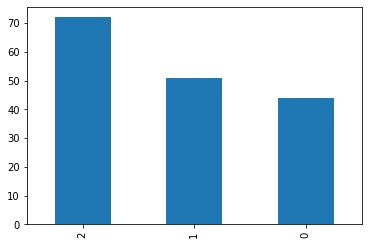

In [121]:
# check count for each cluster
pca_cleaned_final_km['ClusterID'].value_counts().plot(kind='bar');

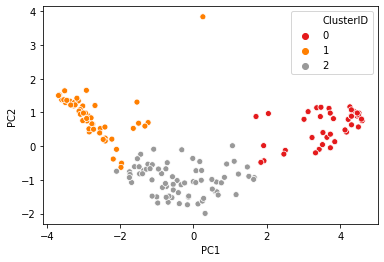

In [122]:
# Plotting 
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',data=pca_cleaned_final_km,palette='Set1');

# Kmeans with K=4


In [123]:
# Applying Kmeans with K=4
pca_cleaned_final_kmeans4 = KMeans(n_clusters = 4, max_iter=50)
pca_cleaned_final_kmeans4.fit(pca_cleaned_final4);

In [124]:
pca_cleaned_final_km4=pd.concat([pca_cleaned.reset_index().drop('index',axis=1),pd.Series(pca_cleaned_final_kmeans4.labels_).reset_index().drop('index',axis=1)],axis=1)
pca_cleaned_final_km4.columns=['country','PC1','PC2','PC3','ClusterID']
pca_cleaned_final_km4.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-3.410557,1.335314,-0.234486,2
1,Albania,-0.163978,-1.741221,-0.193250,3
2,Algeria,-0.868662,-0.816567,1.693218,1
3,Angola,-2.918449,1.657255,0.971242,2
4,Antigua and Barbuda,1.469472,-0.618764,-0.592412,3


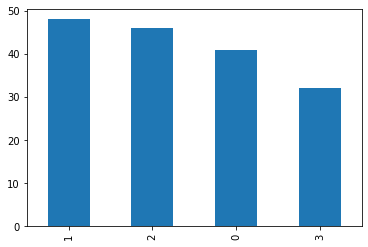

In [125]:
# check count for each cluster
pca_cleaned_final_km4['ClusterID'].value_counts().plot(kind='bar');

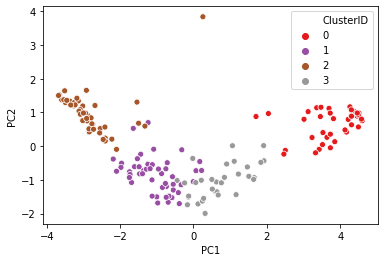

In [126]:
# Plotting 
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',data=pca_cleaned_final_km4,palette='Set1');

# Result
### Kmeans with 4 clusters are not very optimum. So we will go with Kmeans k=3

# Clustere Profiling

In [127]:
# checking for duplicate countries
pca_cleaned_final_km.duplicated().sum()

0

In [128]:
# Merging both data sets
pca_cleaned_final_merg = pd.merge(pca_cleaned_final_km[['ClusterID','country']],countryDf,on='country',how='inner')
pca_cleaned_final_merg.head()

,ClusterID,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,88.31,55.30,41.9174,248.297,1610.0,9.44,56.2,5.023,553.0
1,2,Albania,16.60,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0
2,2,Algeria,27.30,1712.64,185.9820,1400.440,12900.0,15.33,76.5,2.890,4460.0
3,1,Angola,88.31,2199.19,100.6050,1514.370,5900.0,15.33,60.1,5.023,3530.0
4,2,Antigua and Barbuda,10.30,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0


### Analysing of clusters
- Since we need to find countries that need aid, we will look and analysis the gdpp, child_mort, and income of each country
- We will calculate the average of each of the above for each cluster

In [129]:
# Getting the average (mean) for each cluster
pca_cleaned_final_merg.drop('country',axis=1).groupby('ClusterID')[['gdpp','child_mort','income']].mean()

,gdpp,child_mort,income
ClusterID,,,
0,26717.045455,6.072727,32427.272727
1,1861.476078,75.775490,3877.974902
2,5658.277778,21.552778,11197.916667


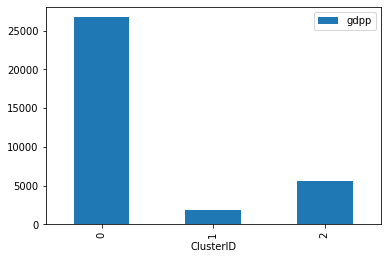

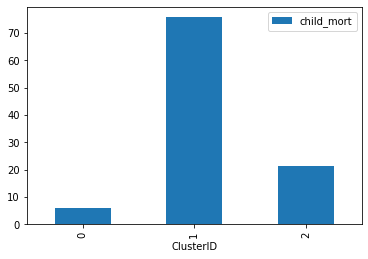

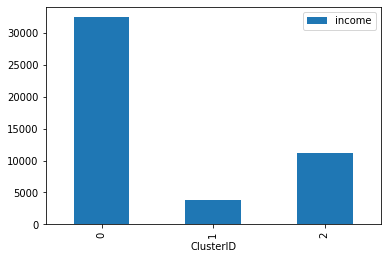

In [130]:
# Plotting the above per cluter
pca_cleaned_final_merg.drop('country',axis=1).groupby('ClusterID')[['gdpp']].mean().plot(kind='bar')
pca_cleaned_final_merg.drop('country',axis=1).groupby('ClusterID')[['child_mort']].mean().plot(kind='bar')
pca_cleaned_final_merg.drop('country',axis=1).groupby('ClusterID')[['income']].mean().plot(kind='bar');

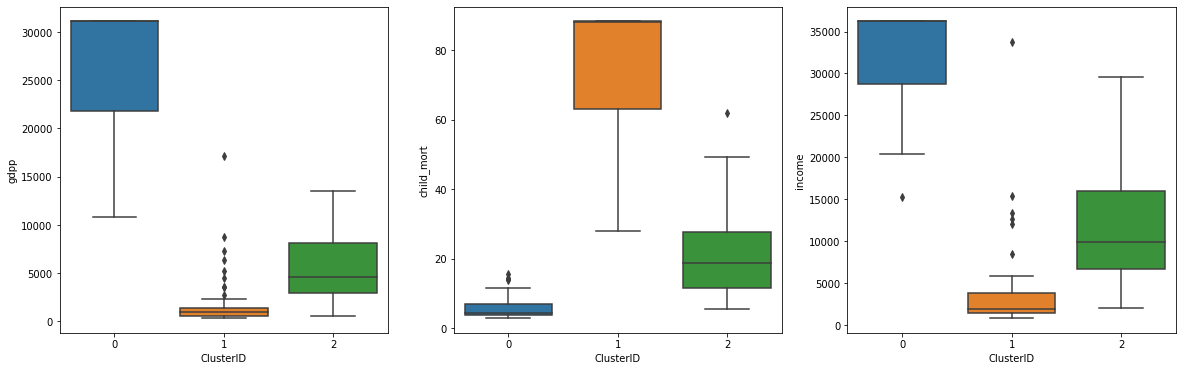

In [131]:
# and if we plot a boxplot that will show more clearly that low and higher clusters
plt.figure(figsize=(20,6))
for i in enumerate(['gdpp','child_mort','income']):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x='ClusterID',y=i[1],data=pca_cleaned_final_merg)

## Assumption
- ##### Cluster 1 is countries that have very low GDP about 1861, high mortality rate =78, and low income of about 3878.
- ##### So our target countries that will need aid from HELP international would fall under cluster 1

### Listing countries under cluster 1

In [132]:
print(pca_cleaned_final_merg[pca_cleaned_final_merg.ClusterID==1]['country'].values)
print(len(pca_cleaned_final_merg[pca_cleaned_final_merg.ClusterID==1]['country'].values))

['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'India' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Myanmar' 'Namibia' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'Solomon Islands'
 'South Africa' 'Sudan' 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Uganda' 'Yemen' 'Zambia']
51


# Hierarchical clustering

In [133]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

- ### Single clustering


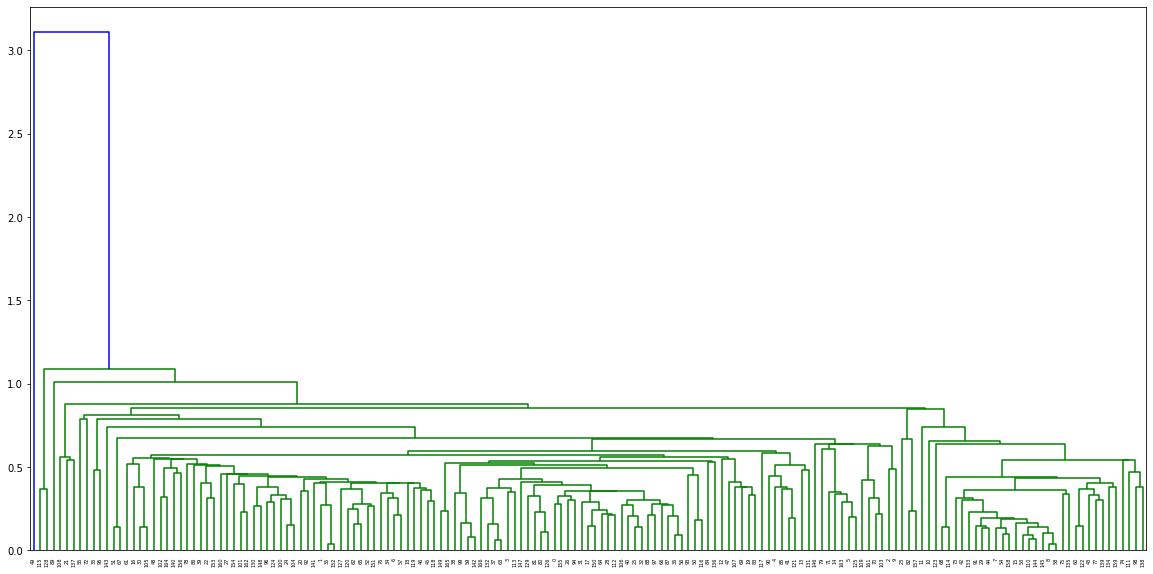

In [134]:
plt.figure(figsize = (20,10))
mergings1 = linkage(pca_cleaned_final_hierchy, method = "single", metric='euclidean')
dendrogram(mergings1)
plt.show()

In [135]:
clusterCut1 = pd.Series(cut_tree(mergings1, n_clusters = 4).reshape(-1,))
pca_cleaned_final_h1 = pd.concat([pca_cleaned_final_hierchy, clusterCut1], axis=1)
pca_cleaned_final_h1.columns = ["PC1","PC2","PC3","ClusterID"]
pca_cleaned_final_h1.head()

,PC1,PC2,PC3,ClusterID
0,-3.410557,1.335314,-0.234486,0
1,-0.163978,-1.741221,-0.193250,0
2,-0.868662,-0.816567,1.693218,0
3,-2.918449,1.657255,0.971242,0
4,1.469472,-0.618764,-0.592412,0


In [136]:
# Merging data set
pca_cleaned_final_hc1 = pd.concat([countryDf['country'],pca_cleaned_final_h1], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cleaned_final_hc1.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-3.410557,1.335314,-0.234486,0
1,Albania,-0.163978,-1.741221,-0.193250,0
2,Algeria,-0.868662,-0.816567,1.693218,0
3,Angola,-2.918449,1.657255,0.971242,0
4,Antigua and Barbuda,1.469472,-0.618764,-0.592412,0


In [137]:
# Merging with original data set
pca_cleaned_final_hc1s = pca_cleaned_final_hc1[['country','ClusterID']].merge(countryDf, on = 'country')
pca_cleaned_final_hc1s.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,88.31,55.30,41.9174,248.297,1610.0,9.44,56.2,5.023,553.0
1,Albania,0,16.60,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0
2,Algeria,0,27.30,1712.64,185.9820,1400.440,12900.0,15.33,76.5,2.890,4460.0
3,Angola,0,88.31,2199.19,100.6050,1514.370,5900.0,15.33,60.1,5.023,3530.0
4,Antigua and Barbuda,0,10.30,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0


In [138]:
# Getting the average (mean) for each cluster
pca_cleaned_final_hc1s.drop('country',axis=1).groupby('ClusterID')[['gdpp','child_mort','income']].mean()

,gdpp,child_mort,income
ClusterID,,,
0,9877.799264,34.056687,14080.532025
1,17100.000000,88.310000,33700.000000
2,12100.000000,16.600000,29600.000000
3,19300.000000,13.700000,36200.000000


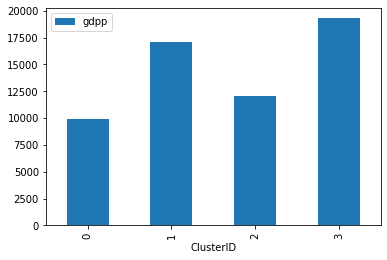

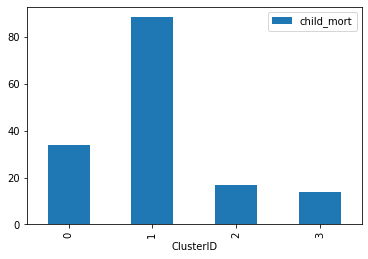

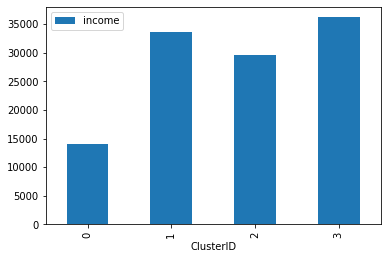

In [139]:
# Plotting the above per cluter
pca_cleaned_final_hc1s.drop('country',axis=1).groupby('ClusterID')[['gdpp']].mean().plot(kind='bar')
pca_cleaned_final_hc1s.drop('country',axis=1).groupby('ClusterID')[['child_mort']].mean().plot(kind='bar')
pca_cleaned_final_hc1s.drop('country',axis=1).groupby('ClusterID')[['income']].mean().plot(kind='bar');

#### The single clustering does not give a meaningfull clustering and it is more random. So we choose the complete method to do the hierarchical clustering.

- ### Complete clustering

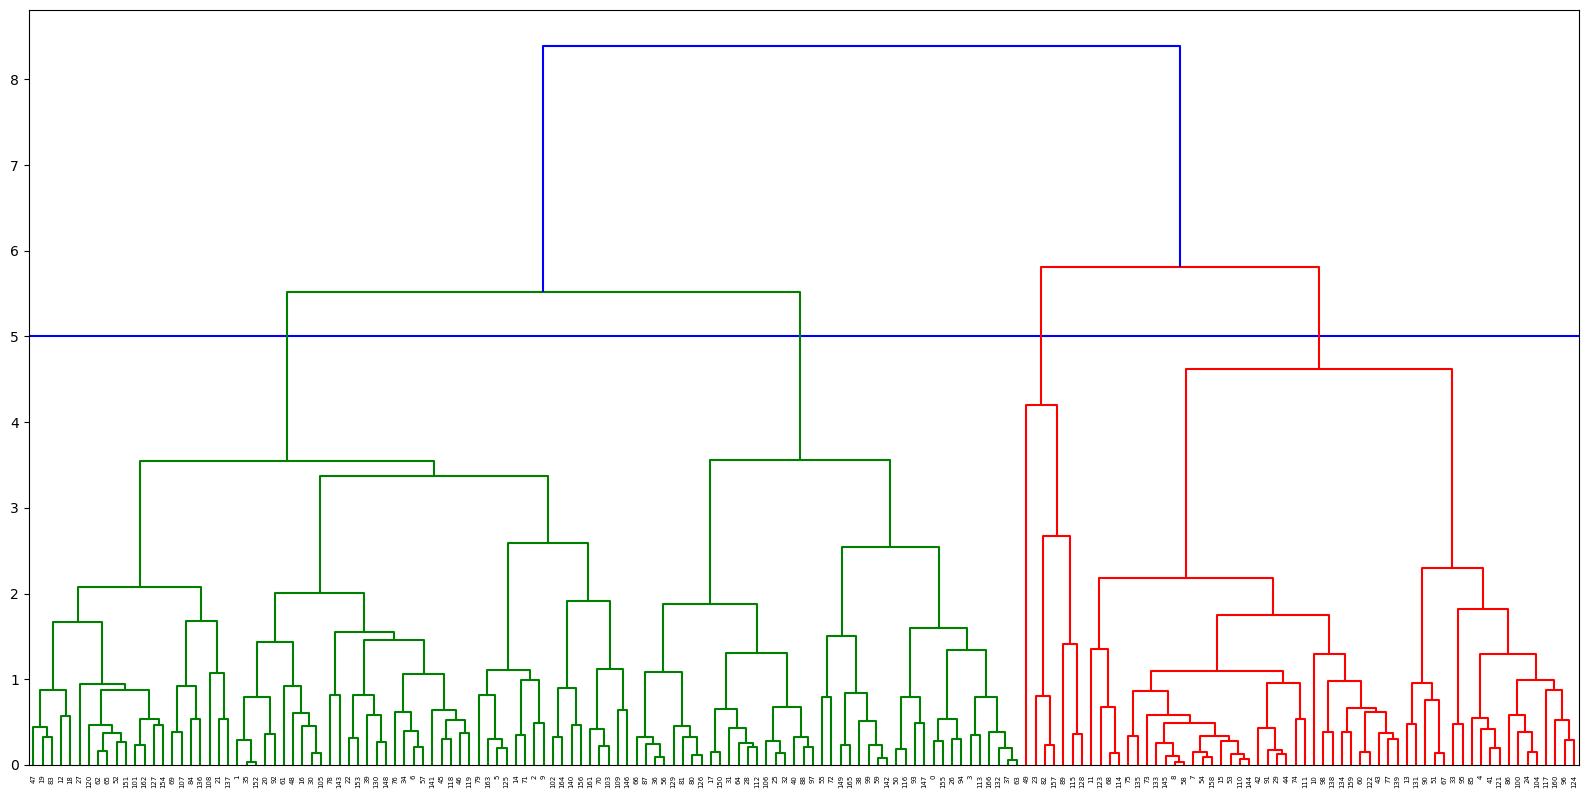

In [140]:
plt.figure(figsize=(20,10),dpi=100)
mergings = linkage(pca_cleaned_final_hierchy, method = "complete", metric='euclidean')
plt.hlines(y=5, xmax=2000, xmin=0, colors="b", linestyles="-")
dendrogram(mergings)
plt.show()

##### Looking at both degdogram the complete seem most and better
##### Looking at the complete dedrogram it is most optimus to cut at n = 4 i

In [141]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
pca_cleaned_final_h = pd.concat([pca_cleaned_final_hierchy, clusterCut], axis=1)
pca_cleaned_final_h.columns = ["PC1","PC2","PC3","ClusterID"]
pca_cleaned_final_h.head()

,PC1,PC2,PC3,ClusterID
0,-3.410557,1.335314,-0.234486,0
1,-0.163978,-1.741221,-0.193250,1
2,-0.868662,-0.816567,1.693218,1
3,-2.918449,1.657255,0.971242,0
4,1.469472,-0.618764,-0.592412,2


In [142]:
# Merging data set
pca_cleaned_final_hc = pd.concat([countryDf['country'],pca_cleaned_final_h], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cleaned_final_hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-3.410557,1.335314,-0.234486,0
1,Albania,-0.163978,-1.741221,-0.193250,1
2,Algeria,-0.868662,-0.816567,1.693218,1
3,Angola,-2.918449,1.657255,0.971242,0
4,Antigua and Barbuda,1.469472,-0.618764,-0.592412,2


# Cluster Profiling

In [143]:
# Merging with original data set
pca_cleaned_final_hc2 = pca_cleaned_final_hc[['country','ClusterID']].merge(countryDf, on = 'country')
pca_cleaned_final_hc2.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,88.31,55.30,41.9174,248.297,1610.0,9.44,56.2,5.023,553.0
1,Albania,1,16.60,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0
2,Algeria,1,27.30,1712.64,185.9820,1400.440,12900.0,15.33,76.5,2.890,4460.0
3,Angola,0,88.31,2199.19,100.6050,1514.370,5900.0,15.33,60.1,5.023,3530.0
4,Antigua and Barbuda,2,10.30,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0


### Analysing of clusters
- Since we need to find countries that need aid, we will look and analysis the gdpp, child_mort, and income of each country
- We will calculate the average of each of the above for each cluster

In [144]:
# Getting the average (mean) for each cluster
pca_cleaned_final_hc2.drop('country',axis=1).groupby('ClusterID')[['gdpp','child_mort','income']].mean()

,gdpp,child_mort,income
ClusterID,,,
0,1274.030476,79.320000,2721.826667
1,4344.030769,28.244615,8989.384615
2,22281.886792,6.679245,28073.584906
3,23010.000000,23.172857,34900.000000


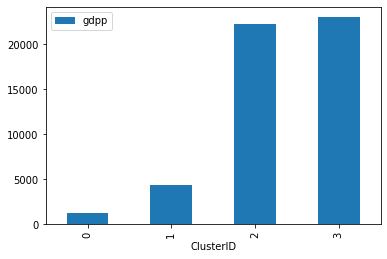

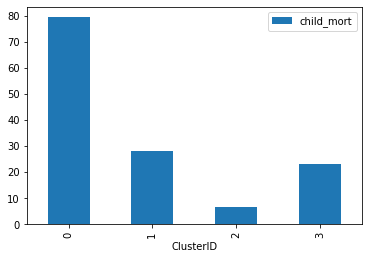

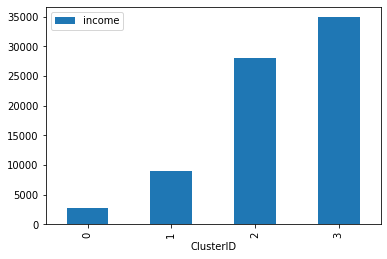

In [145]:
# Plotting the above per cluter
pca_cleaned_final_hc2.drop('country',axis=1).groupby('ClusterID')[['gdpp']].mean().plot(kind='bar')
pca_cleaned_final_hc2.drop('country',axis=1).groupby('ClusterID')[['child_mort']].mean().plot(kind='bar')
pca_cleaned_final_hc2.drop('country',axis=1).groupby('ClusterID')[['income']].mean().plot(kind='bar');

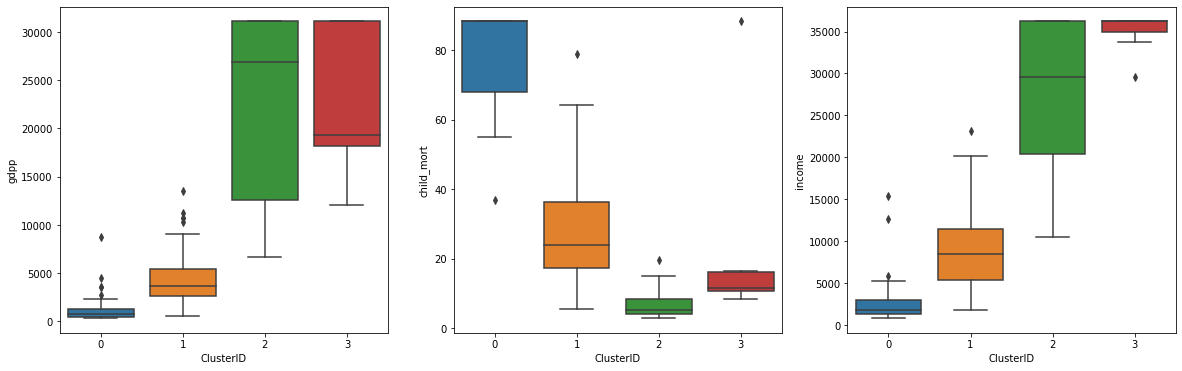

In [146]:
# and if we plot a boxplot that will show more clearly that low and higher clusters
plt.figure(figsize=(20,6))
for i in enumerate(['gdpp','child_mort','income']):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x='ClusterID',y=i[1],data=pca_cleaned_final_hc2)

## Assumption
- ##### Cluster 0 is countries that have very low GDP about 1274, high mortality rate =79, and low income of about 2722.
- ##### So our target countries that will need aid from HELP international would fall under cluster 0

### Listing countries under cluster 0 

In [147]:
print(pca_cleaned_final_hc2[pca_cleaned_final_hc2.ClusterID==0]['country'].values)
print(len(pca_cleaned_final_hc2[pca_cleaned_final_hc2.ClusterID==0]['country'].values))

['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Eritrea' 'Gabon' 'Gambia' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya' 'Kiribati' 'Lesotho' 'Liberia'
 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Mozambique' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'Sudan' 'Tanzania'
 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
42


### Countries below average gdpp (1274), average income (2722) and above average child mortality (79)

In [148]:
# to be on the safe side, we can futher narrow down the list of cluser 0 countries by filtering countries
# below average gdpp and income and above average child mortality 
print(country_df[((pca_cleaned_final_hc2['gdpp']<1274.030476) & (pca_cleaned_final_hc2['ClusterID']==0)) &
           ((pca_cleaned_final_hc2['income']<2721.826667) & (pca_cleaned_final_hc2['ClusterID']==0))&
           ((pca_cleaned_final_hc2['child_mort']>79.320000) & (pca_cleaned_final_hc2['ClusterID']==0))]['country'].values)
print(len(country_df[((pca_cleaned_final_hc2['gdpp']<1274.030476) & (pca_cleaned_final_hc2['ClusterID']==0)) &
           ((pca_cleaned_final_hc2['income']<2721.826667) & (pca_cleaned_final_hc2['ClusterID']==0))&
           ((pca_cleaned_final_hc2['child_mort']>79.320000) & (pca_cleaned_final_hc2['ClusterID']==0))]['country'].values))

['Afghanistan' 'Benin' 'Burkina Faso' 'Burundi' 'Central African Republic'
 'Chad' 'Comoros' 'Congo, Dem. Rep.' "Cote d'Ivoire" 'Gambia' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Lesotho' 'Liberia' 'Malawi' 'Mali' 'Mozambique'
 'Niger' 'Sierra Leone' 'Togo' 'Uganda']
22


In [149]:
last_countries=country_df[((pca_cleaned_final_hc2['gdpp']<1274.030476) & (pca_cleaned_final_hc2['ClusterID']==0)) &
           ((pca_cleaned_final_hc2['income']<2721.826667) & (pca_cleaned_final_hc2['ClusterID']==0))&
           ((pca_cleaned_final_hc2['child_mort']>79.320000) &
            (pca_cleaned_final_hc2['ClusterID']==0))][['country','gdpp','income','child_mort']].sort_values(['gdpp', 'income','child_mort'], ascending=[True, True, False])

In [150]:
last_countries.reset_index().drop('index',axis=1,inplace=True)
last_countries.to_csv('final countries.csv')

# Final Result anc Conclusion

 - According to World Bank, https://datahelpdesk.worldbank.org/knowledgebase/articles/906519
 - Countries with GNI or income of per capita between ```$1,026``` and ```$3,995``` is considered as low-middle income countries and countries with lower GNI of ```$1,025``` is considered as low-income countries.
 - These countries have a very high percenetage of population under poverty line
 
 
 - ### Assuming our data set reflects that latest data then
 - These lists out those countries that have average income of $2722, high child mortality rate of 79 and low gdpp of $1274. So the following countries will fall under above average values.
 
### These countries are (42 countries):
'Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Eritrea' 'Gabon' 'Gambia' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya' 'Kiribati' 'Lesotho' 'Liberia'
 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Mozambique' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'Sudan' 'Tanzania'
 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia'
 
##### But still if a prioritization is needed or the budget is limited or want to be more strict then it is we can filter down the above countries who are below average income of $2722, gdpp of $1274 and child mortality rate above average of 79 children.
 
### These countries are (there are 22 countries that falls in this category):
'Afghanistan' 'Benin' 'Burkina Faso' 'Burundi' 'Central African Republic'
 'Chad' 'Comoros' 'Congo, Dem. Rep.' "Cote d'Ivoire" 'Gambia' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Lesotho' 'Liberia' 'Malawi' 'Mali' 'Mozambique'
 'Niger' 'Sierra Leone' 'Togo' 'Uganda'


In [151]:
# list of 22 countries above with GDPP, income and child mortality
last_countries

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
88,Liberia,327,700,89.3
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
94,Malawi,459,1030,90.5
150,Togo,488,1210,90.3
64,Guinea-Bissau,547,1390,114.0


In [152]:
# top 5 direst countries
last_countries.head(5)

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
88,Liberia,327,700,89.3
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
